In [1]:
# first some imports
import cdsapi #Interface into ERA5 data
import pyart # The Python ARM Radar Toolkit
import cartopy.crs as ccrs # A toolkit for map projections
import cartopy.feature as cfeature # A method for adding coastlines etc
import cartopy.io.img_tiles as cimgt # an API into things like google maps
import numpy as np #The famous numpy package!
from matplotlib import pyplot as plt
import os
import xarray as xr
import pydda
from copy import deepcopy
#Now a Jupyter "Magic" for plotting inline
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/Users/scollis/anaconda3/envs/saws/lib/python3.6/site-packages/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/Users/scollis/anaconda3/envs/saws/lib/python3.6/site-packages/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


In [81]:
#Load the radar, this time using the ODIM reader
radar = pyart.aux_io.read_odim_h5(os.path.expanduser('~/data/aus/terryhills/71_20181220_062430.pvol.h5'))

In [82]:
#lets see what is in here!
#How many sweeps?
print(radar.nsweeps)

14


In [83]:
#What tilts?
print(radar.fixed_angle['data'])

[ 0.5  0.9  1.3  1.8  2.4  3.1  4.2  5.6  7.4 10.  13.3 17.9 23.9 32. ]


In [84]:
#what fields
print(radar.fields.keys())

dict_keys(['reflectivity', 'velocity', 'total_power', 'differential_reflectivity', 'cross_correlation_ratio', 'differential_phase', 'specific_differential_phase'])


In [85]:
#range?
print(radar.range['data'][-1]/1000.0)

299.75


# Lets plot a PPI

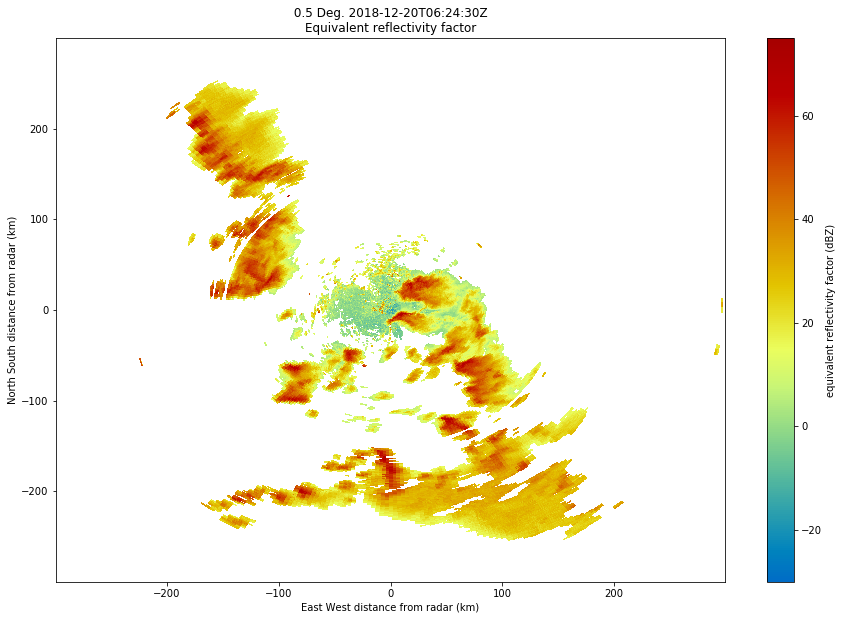

In [86]:
my_figure = plt.figure(figsize=[15,10])
my_radar_display = pyart.graph.RadarDisplay(radar)
my_radar_display.plot_ppi('reflectivity', 0)

min_lat: -36.394470337131885  min_lon: 147.97069738233253  max_lat: -31.00713336159859  max_lon: 154.44730190304745


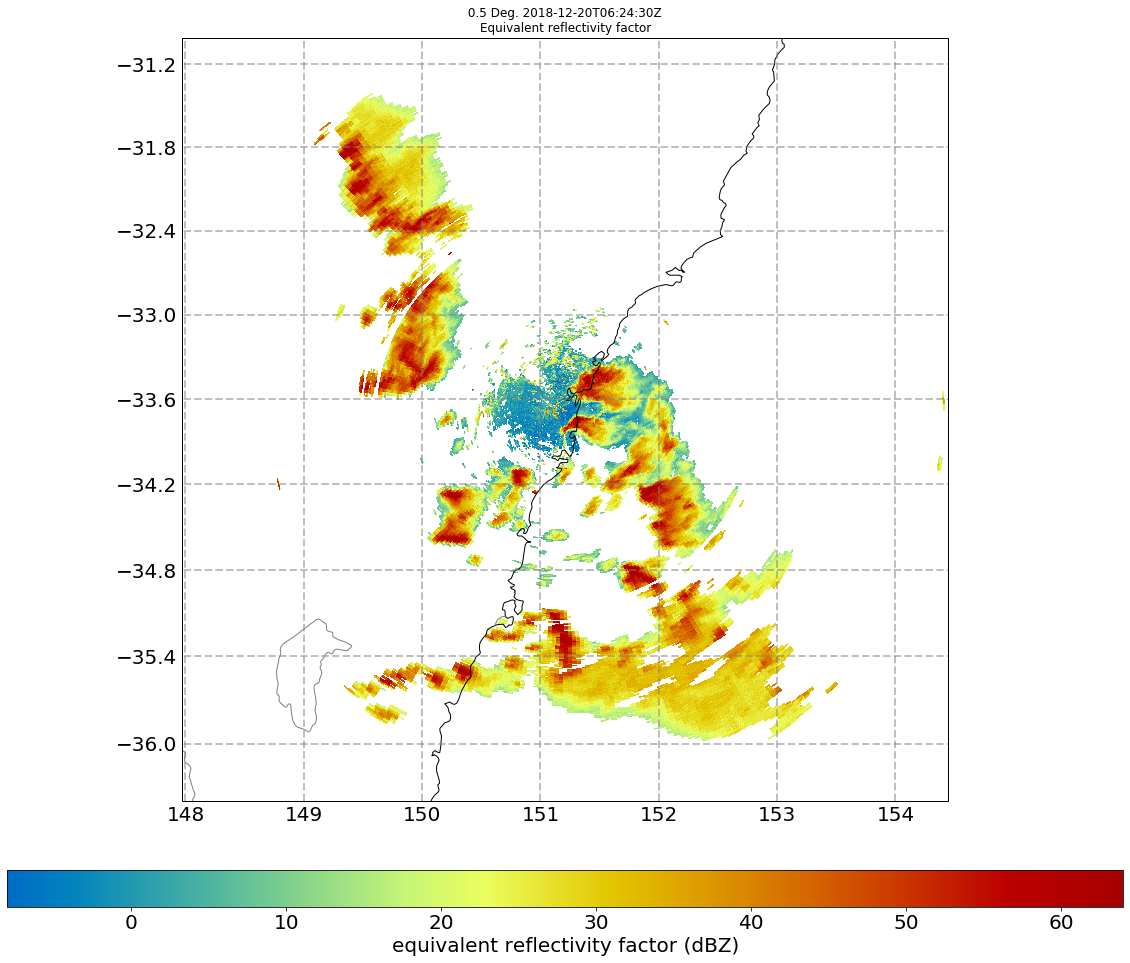

In [87]:
#pretty! but no context!
#lets use the Cartopy package to plot on a map

#I get a bit geeky on this... 

# lets get the extent of the data

lats = radar.gate_latitude
lons = radar.gate_longitude

min_lon = lons['data'].min()
min_lat = lats['data'].min()
max_lat = lats['data'].max()
max_lon = lons['data'].max()

print('min_lat:', min_lat, ' min_lon:', min_lon, 
      ' max_lat:', max_lat, ' max_lon:', max_lon)


#set up the plot
myf = plt.figure(figsize=[20,18])
display = pyart.graph.RadarMapDisplay(radar)
lat_0 = display.loc[0]
lon_0 = display.loc[1]

# Set up the GIS projection
projection = ccrs.Mercator(
                central_longitude=lon_0,
                min_latitude=min_lat, max_latitude=max_lat)

#plot a PPI. We specifically ask Py-ART not to add the colorbar... 
#We will customize this to make it nice.

display.plot_ppi_map(
    'reflectivity', 0,
    projection=projection, colorbar_flag=False,
    min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
    vmin=-8, vmax=64,
    resolution='10m')


#here is our pretty colorbar code
lb = display._get_colorbar_label('reflectivity')
cb = plt.colorbar(display.plots[0], aspect=30, pad=0.07, 
                  orientation='horizontal')

cb.ax.tick_params(labelsize=20)

cb.set_label(lb, fontsize=20)

#Now we add lat lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5,
                          linestyle='--')

gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

gl.xlabels_top = False
gl.ylabels_right = False

In [88]:
print(radar.fields['velocity']['data'].max())
print(radar.fields['velocity']['data'].min())


nan
nan


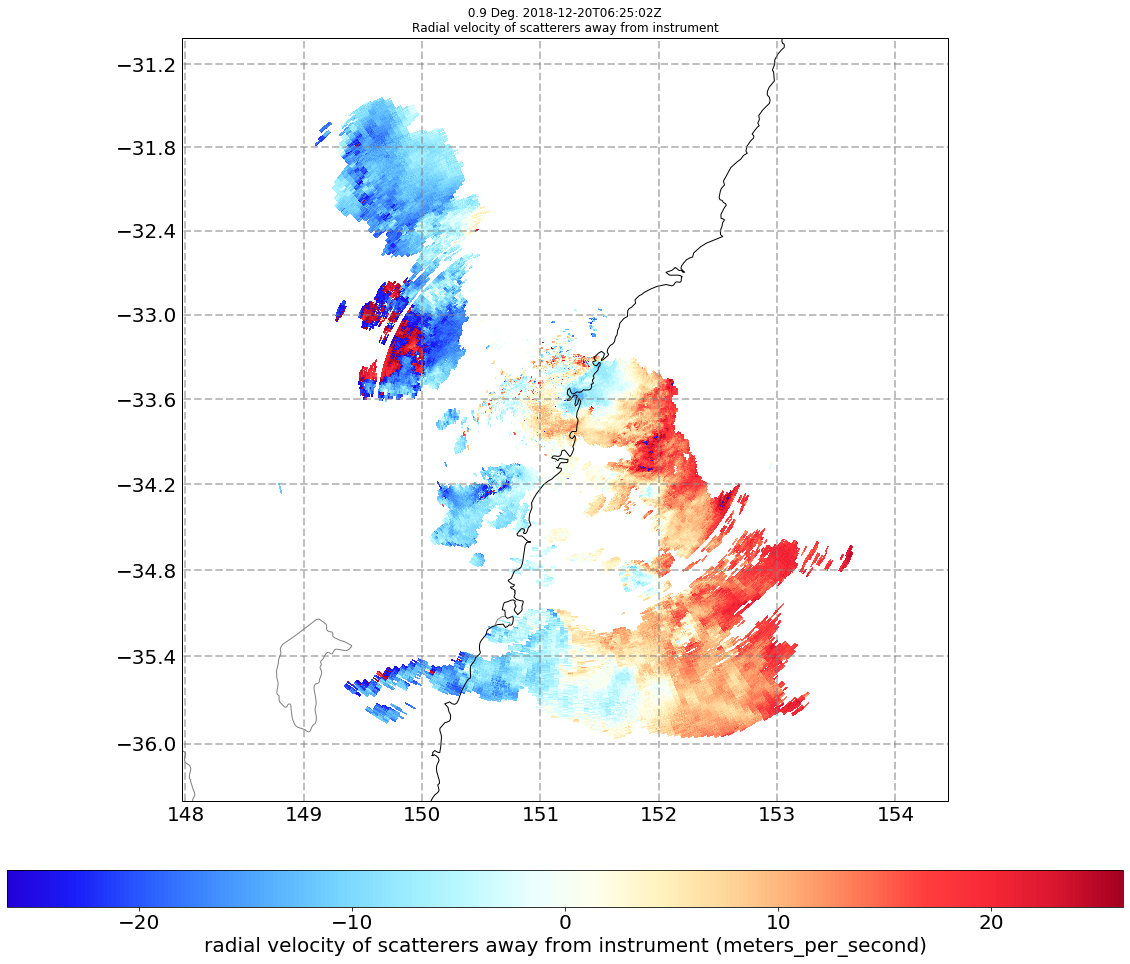

In [89]:
nyq = 26.21
#set up the plot
myf = plt.figure(figsize=[20,18])
display = pyart.graph.RadarMapDisplay(radar)
lat_0 = display.loc[0]
lon_0 = display.loc[1]

#plot a PPI. We specifically ask Py-ART not to add the colorbar... 
#We will customize this to make it nice.

display.plot_ppi_map(
    'velocity', 1,
    projection=projection, colorbar_flag=False,
    min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
    vmin=-nyq, vmax=nyq,
    resolution='10m')


#here is our pretty colorbar code
lb = display._get_colorbar_label('velocity')
cb = plt.colorbar(display.plots[0], aspect=30, pad=0.07, 
                  orientation='horizontal')

cb.ax.tick_params(labelsize=20)

cb.set_label(lb, fontsize=20)

#Now we add lat lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5,
                          linestyle='--')

gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

gl.xlabels_top = False
gl.ylabels_right = False

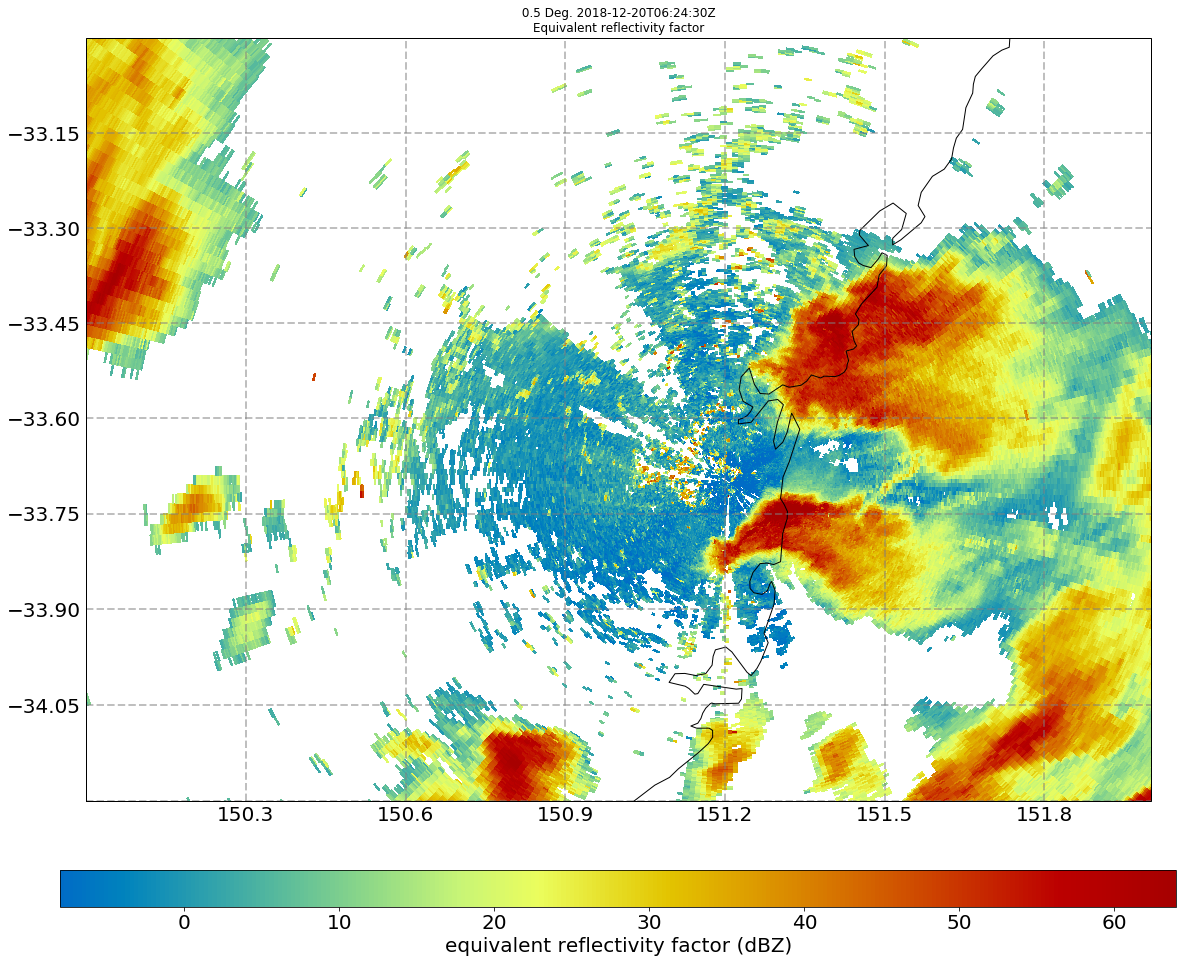

In [90]:
#pretty! but no context!
#lets use the Cartopy package to plot on a map

#I get a bit geeky on this... 

# lets get the extent of the data


#set up the plot
myf = plt.figure(figsize=[20,18])
display = pyart.graph.RadarMapDisplay(radar)

#plot a PPI. We specifically ask Py-ART not to add the colorbar... 
#We will customize this to make it nice.

display.plot_ppi_map(
    'reflectivity', 0,
    projection=projection, colorbar_flag=False,
    min_lon=150, max_lon=152, min_lat=-34.2, max_lat=-33,
    vmin=-8, vmax=64,
    resolution='10m')


#here is our pretty colorbar code
lb = display._get_colorbar_label('reflectivity')
cb = plt.colorbar(display.plots[0], aspect=30, pad=0.07, 
                  orientation='horizontal')

cb.ax.tick_params(labelsize=20)

cb.set_label(lb, fontsize=20)

#Now we add lat lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5,
                          linestyle='--')

gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

gl.xlabels_top = False
gl.ylabels_right = False

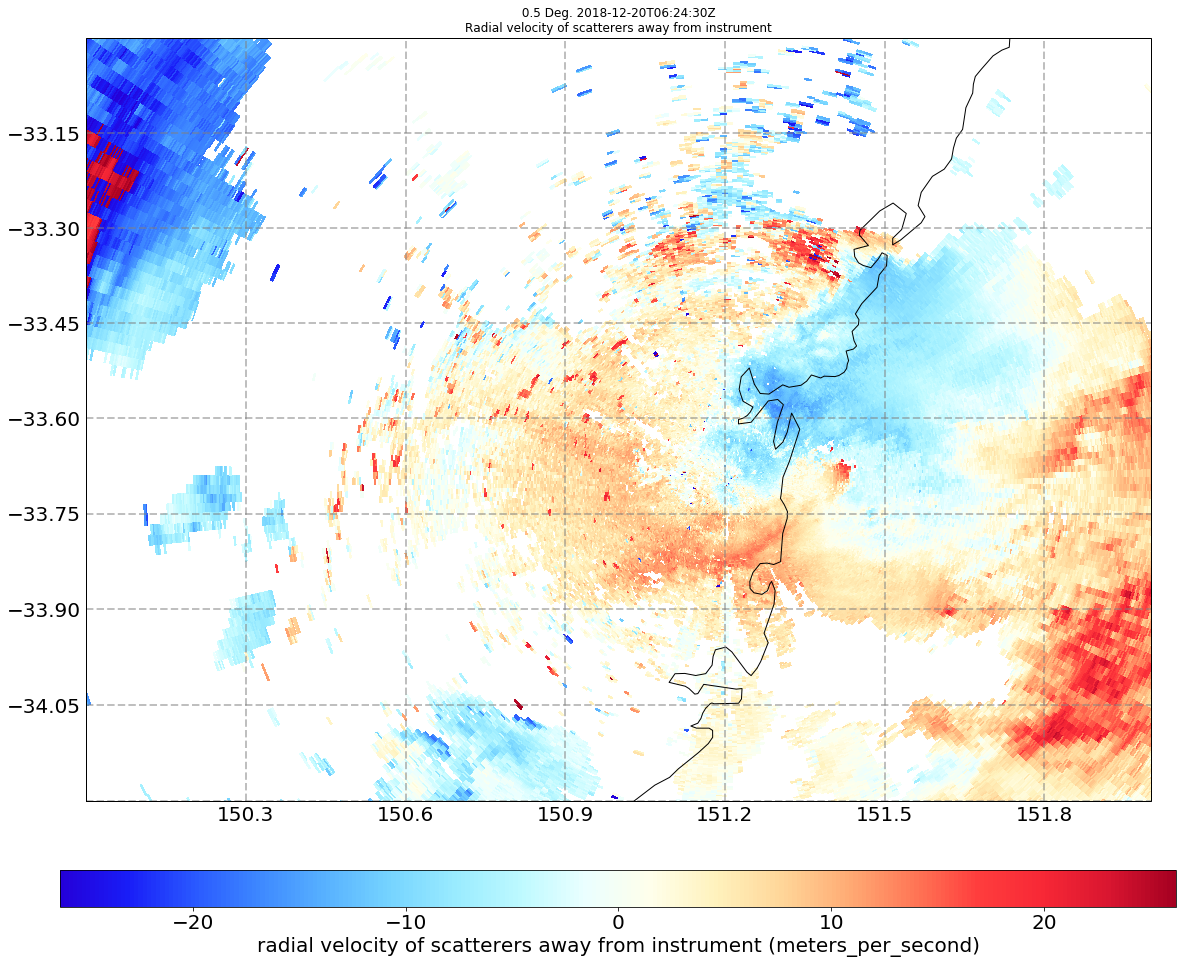

In [91]:
#pretty! but no context!
#lets use the Cartopy package to plot on a map

#I get a bit geeky on this... 

# lets get the extent of the data


#set up the plot
myf = plt.figure(figsize=[20,18])
display = pyart.graph.RadarMapDisplay(radar)

#plot a PPI. We specifically ask Py-ART not to add the colorbar... 
#We will customize this to make it nice.

display.plot_ppi_map(
    'velocity', 0,
    projection=projection, colorbar_flag=False,
    min_lon=150, max_lon=152, min_lat=-34.2, max_lat=-33,
    vmin=-nyq, vmax=nyq,
    resolution='10m')


#here is our pretty colorbar code
lb = display._get_colorbar_label('velocity')
cb = plt.colorbar(display.plots[0], aspect=30, pad=0.07, 
                  orientation='horizontal')

cb.ax.tick_params(labelsize=20)

cb.set_label(lb, fontsize=20)

#Now we add lat lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5,
                          linestyle='--')

gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

gl.xlabels_top = False
gl.ylabels_right = False

## A Quick introduction to a powerful Py-ART tool: The GateFilter

http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.filters.GateFilter.html

In [92]:
# A gatefilter allows you to construct binary fields in a readable fashion
my_gatefilter = pyart.filters.GateFilter(radar)
dir(my_gatefilter)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_gate_excluded',
 '_get_fdata',
 '_merge',
 '_radar',
 'copy',
 'exclude_above',
 'exclude_all',
 'exclude_below',
 'exclude_equal',
 'exclude_gates',
 'exclude_inside',
 'exclude_invalid',
 'exclude_masked',
 'exclude_none',
 'exclude_not_equal',
 'exclude_outside',
 'exclude_transition',
 'gate_excluded',
 'gate_included',
 'include_above',
 'include_all',
 'include_below',
 'include_equal',
 'include_gates',
 'include_inside',
 'include_none',
 'include_not_equal',
 'include_not_masked',
 'include_not_transition',
 'include_outside',
 'include_valid']

In [93]:
# nice example why this is handy:
print(radar.fields['reflectivity']['data'].mean())
my_gatefilter.include_all()
my_gatefilter.exclude_invalid('reflectivity')
print(radar.fields['reflectivity']['data'][my_gatefilter.gate_included].mean())

nan
17.25380230055307


In [94]:
print(radar.fields['velocity']['data'][my_gatefilter.gate_included].max())
print(radar.fields['velocity']['data'][my_gatefilter.gate_included].min())


26.199945
-26.2


## Its great for quick QC

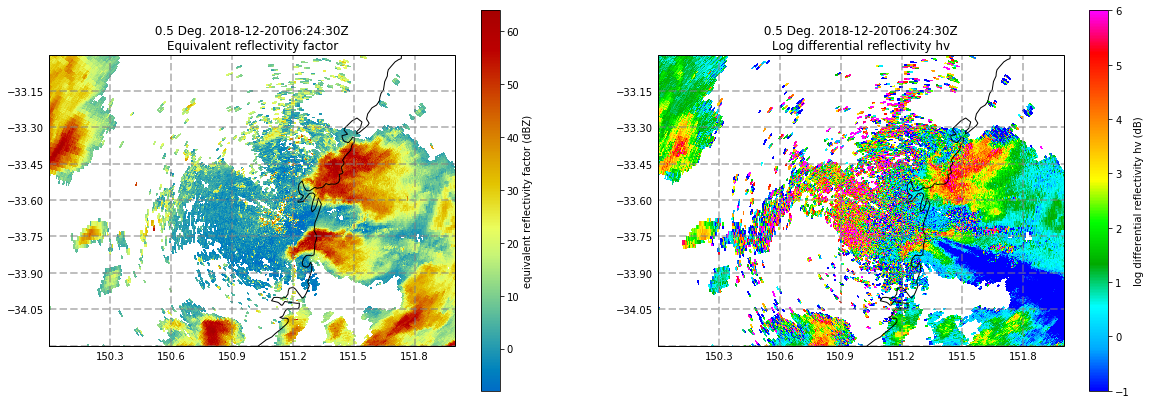

In [95]:
myfig, (ax1, ax2) = plt.subplots(1, 2,
                                 figsize=[20,7],
                                 subplot_kw = {'projection':projection})

display = pyart.graph.RadarMapDisplay(radar)
projection = ccrs.Mercator(
                central_longitude=lon_0,
                min_latitude=min_lat, max_latitude=max_lat)



display.plot_ppi_map(
    'reflectivity', 0,
    projection=projection,
    min_lon=150, max_lon=152, min_lat=-34.2, max_lat=-33,
    vmin=-8, vmax=64,
    resolution='10m', ax=ax1)

gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5,
                          linestyle='--')

gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}
gl.xlabels_top = False
gl.ylabels_right = False

display.plot_ppi_map(
    'differential_reflectivity', 0,
    projection=projection,
    min_lon=150, max_lon=152, min_lat=-34.2, max_lat=-33,
    vmin=-1, vmax=6,
    resolution='10m', ax=ax2)

g2 = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5,
                          linestyle='--')

g2.xlabel_style = {'size': 10}
g2.ylabel_style = {'size': 10}
g2.xlabels_top = False
g2.ylabels_right = False



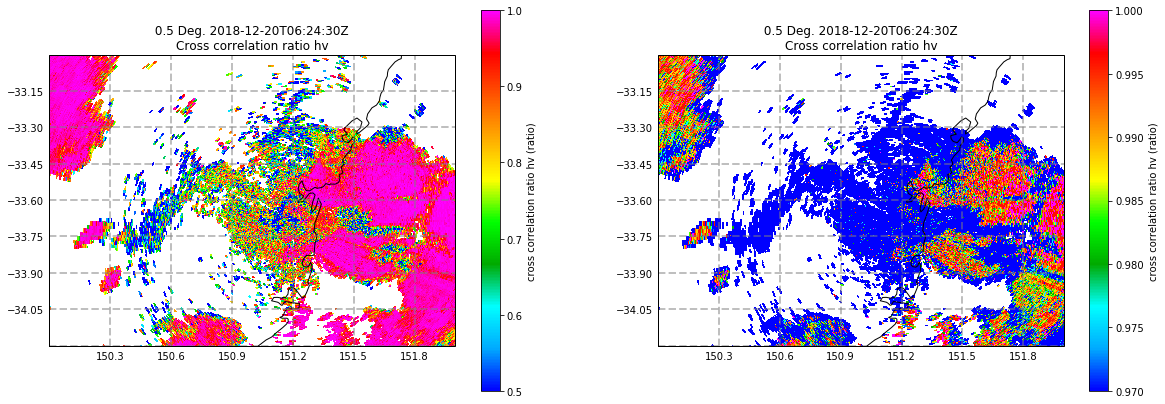

In [96]:
myfig, (ax1, ax2) = plt.subplots(1, 2,
                                 figsize=[20,7],
                                 subplot_kw = {'projection':projection})

display = pyart.graph.RadarMapDisplay(radar)
projection = ccrs.Mercator(
                central_longitude=lon_0,
                min_latitude=min_lat, max_latitude=max_lat)



display.plot_ppi_map(
    'cross_correlation_ratio', 0,
    projection=projection,
    min_lon=150, max_lon=152, min_lat=-34.2, max_lat=-33,
    vmin=0.50, vmax=1,
    resolution='10m', ax=ax1)

gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5,
                          linestyle='--')

gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}
gl.xlabels_top = False
gl.ylabels_right = False

display.plot_ppi_map(
    'cross_correlation_ratio', 0,
    projection=projection,
    min_lon=150, max_lon=152, min_lat=-34.2, max_lat=-33,
    vmin=0.97, vmax=1,
    resolution='10m', ax=ax2)

g2 = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5,
                          linestyle='--')

g2.xlabel_style = {'size': 10}
g2.ylabel_style = {'size': 10}
g2.xlabels_top = False
g2.ylabels_right = False



 ## We can see that there are very negative ZDR values and values above ~6dB are non-physical. Aslo RHV has a breakpoint around 0.9

In [97]:
my_gatefilter = pyart.filters.GateFilter(radar)
my_gatefilter.include_all()
my_gatefilter.exclude_invalid('reflectivity')
print(radar.fields['reflectivity']['data'][my_gatefilter.gate_included].mean())
my_gatefilter.exclude_above('differential_reflectivity', 6)
my_gatefilter.exclude_below('differential_reflectivity', -4)
my_gatefilter.exclude_below('cross_correlation_ratio', .65)




17.25380230055307


/Users/scollis/anaconda3/envs/saws/lib/python3.6/site-packages/pyart/filters/gatefilter.py:635: RuntimeWarning: invalid value encountered in greater
  marked = self._get_fdata(field) > value
/Users/scollis/anaconda3/envs/saws/lib/python3.6/site-packages/pyart/filters/gatefilter.py:626: RuntimeWarning: invalid value encountered in less
  marked = self._get_fdata(field) < value


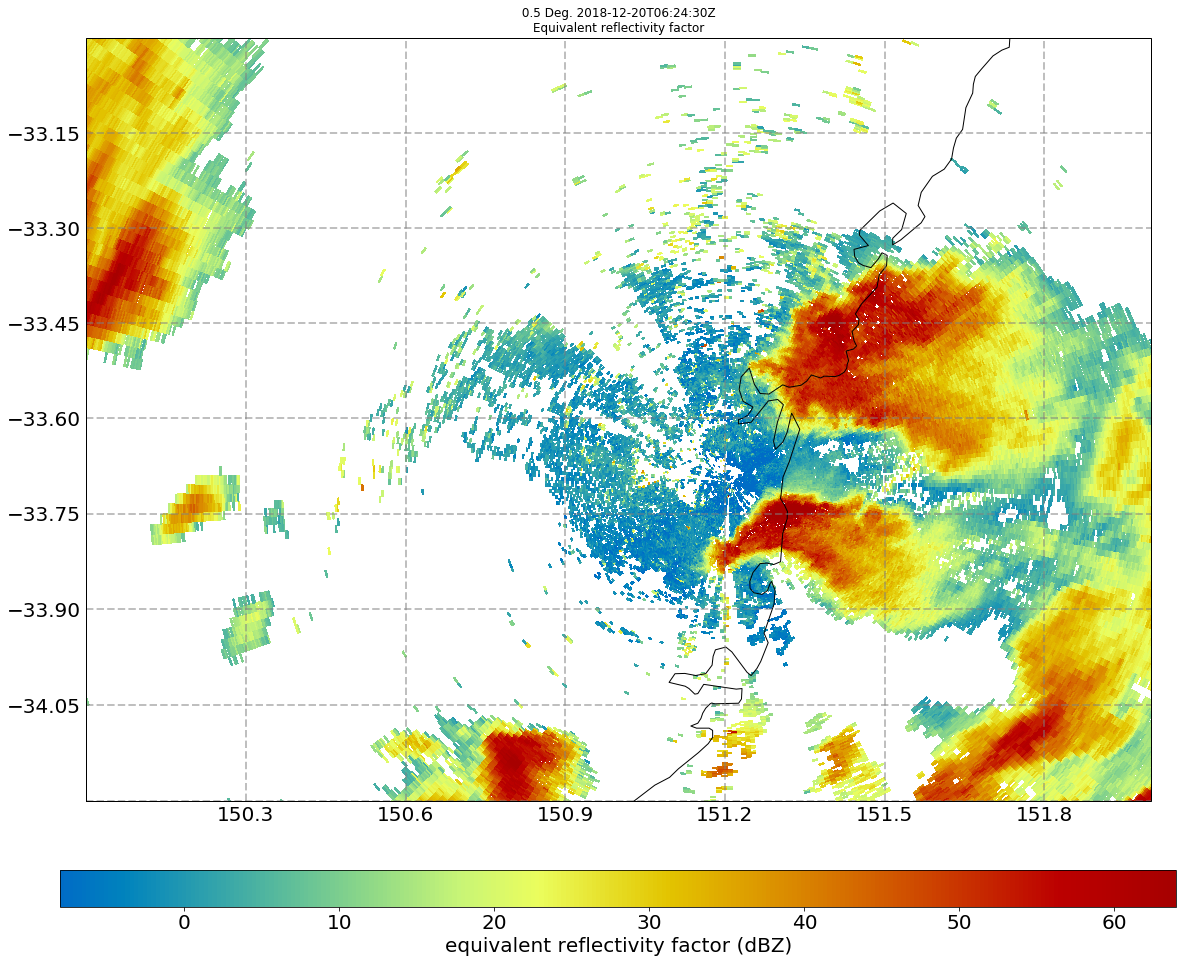

In [98]:
myf = plt.figure(figsize=[20,18])
display = pyart.graph.RadarMapDisplay(radar)

display.plot_ppi_map(
    'reflectivity', 0,
    projection=projection, colorbar_flag=False,
    min_lon=150, max_lon=152, min_lat=-34.2, max_lat=-33,
    vmin=-8, vmax=64,
    resolution='10m', gatefilter=my_gatefilter) # <----------

lb = display._get_colorbar_label('reflectivity')
cb = plt.colorbar(display.plots[0], aspect=30, pad=0.07, 
                  orientation='horizontal')

cb.ax.tick_params(labelsize=20)

cb.set_label(lb, fontsize=20)

#Now we add lat lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5,
                          linestyle='--')

gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

gl.xlabels_top = False
gl.ylabels_right = False

## A nice bit of basic QC.. The Despeckle procedure. 

http://arm-doe.github.io/pyart-docs-travis/dev_reference/generated/pyart.correct.despeckle.despeckle_field.html

In [99]:
gatefilter_specks = pyart.correct.despeckle.despeckle_field(radar, 'reflectivity', gatefilter=my_gatefilter)

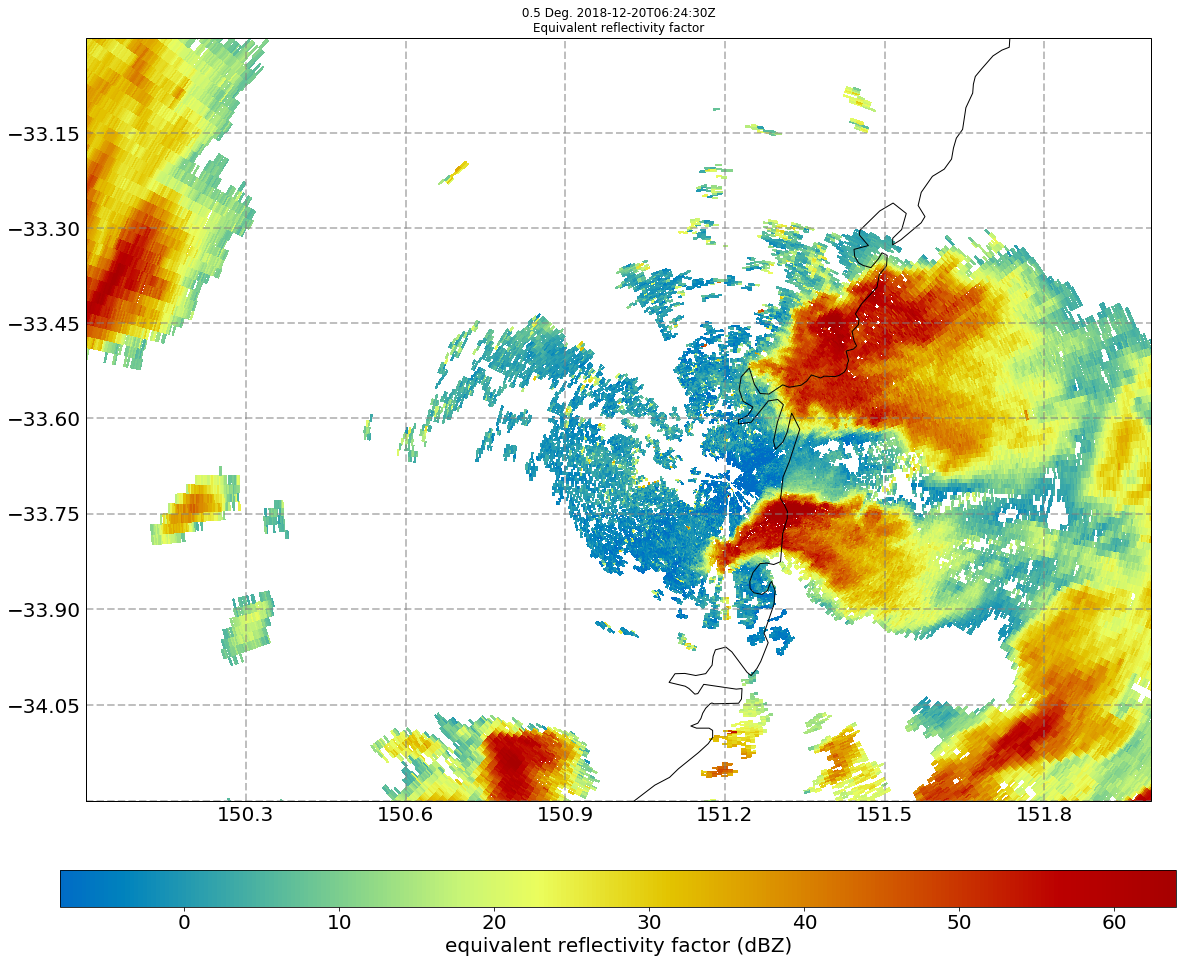

In [100]:

myf = plt.figure(figsize=[20,18])
display = pyart.graph.RadarMapDisplay(radar)

display.plot_ppi_map(
    'reflectivity', 0,
    projection=projection, colorbar_flag=False,
    min_lon=150, max_lon=152, min_lat=-34.2, max_lat=-33,
    vmin=-8, vmax=64,
    resolution='10m', gatefilter=gatefilter_specks)


#here is our pretty colorbar code
lb = display._get_colorbar_label('reflectivity')
cb = plt.colorbar(display.plots[0], aspect=30, pad=0.07, 
                  orientation='horizontal')

cb.ax.tick_params(labelsize=20)

cb.set_label(lb, fontsize=20)

#Now we add lat lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5,
                          linestyle='--')

gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

gl.xlabels_top = False
gl.ylabels_right = False

In [113]:
# Lets explore structure with a sythetic RHI
rhi_radar = pyart.util.xsect.cross_section_ppi(radar, [120])

(0, 50)

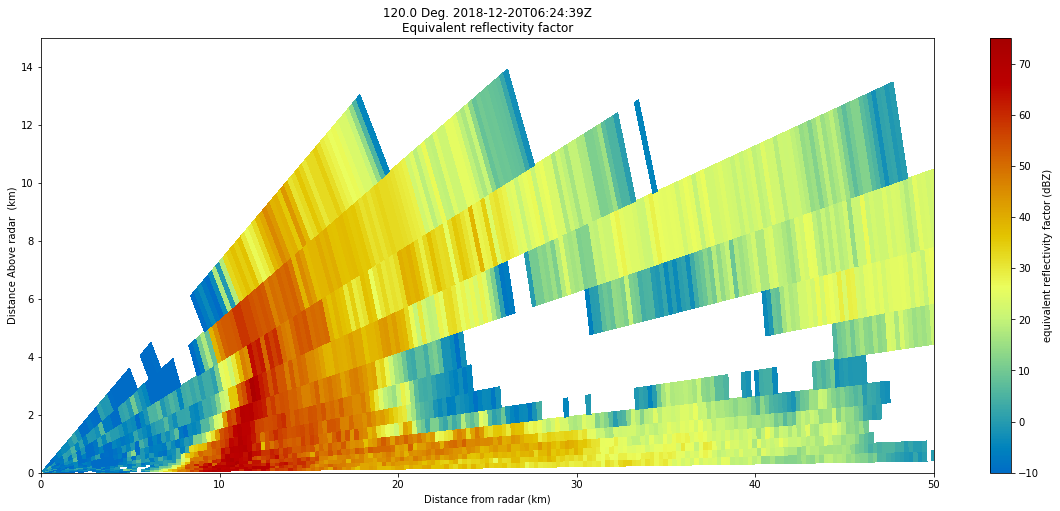

In [114]:
myf = plt.figure(figsize=[20,8])
display = pyart.graph.RadarDisplay(rhi_radar)
display.plot_rhi('reflectivity', 0, vmin=-10)
plt.ylim([0,15])
plt.xlim([0,50])


(0, 100)

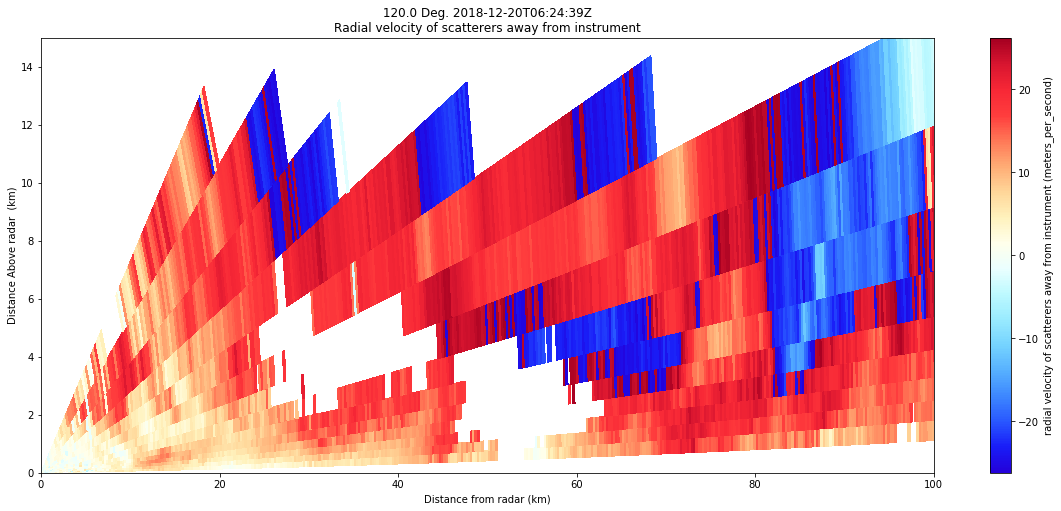

In [115]:
myf = plt.figure(figsize=[20,8])
display = pyart.graph.RadarDisplay(rhi_radar)
display.plot_rhi('velocity', 0, vmin=-nyq, vmax=nyq)
plt.ylim([0,15])
plt.xlim([0,100])


In [116]:
#we have doppler velocity alaising! 

In [117]:
#get profile from reanalysis
dset = xr.load_dataset(os.path.expanduser('~/data/era5_data_aus.nc'))

In [118]:
cprof = dset.sel(longitude=28.5, latitude=-26.0, method='nearest')

In [119]:
#Geopotential height to height... ish...
height = cprof.z/(9.8)

In [120]:
profile = pyart.core.HorizontalWindProfile.from_u_and_v(
        height[0].values, cprof.u[0].values , cprof.v[0].values)

In [121]:
sim_vel = pyart.util.simulated_vel_from_profile(radar, profile)
radar.add_field('simulated_velocity', sim_vel, replace_existing=True)

In [122]:
corr_vel = pyart.correct.dealias_region_based(radar, vel_field='velocity', 
                                              keep_original=False, 
                                              centered=True, nyquist_vel=nyq, 
                                             gatefilter = my_gatefilter)

/Users/scollis/anaconda3/envs/saws/lib/python3.6/site-packages/pyart/correct/region_dealias.py:351: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/Users/scollis/anaconda3/envs/saws/lib/python3.6/site-packages/pyart/correct/region_dealias.py:351: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask


In [125]:
radar.add_field('corrected_velocity', corr_vel, replace_existing=True)

In [126]:
# Lets explore structure with a sythetic RHI
rhi_radar = pyart.util.xsect.cross_section_ppi(radar, [120])


(0, 100)

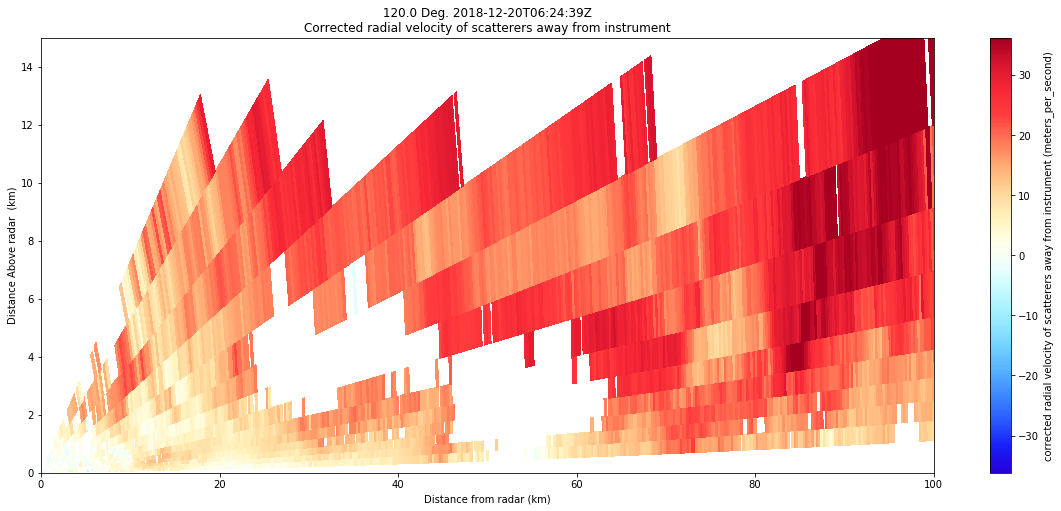

In [127]:
myf = plt.figure(figsize=[20,8])
display = pyart.graph.RadarDisplay(rhi_radar)
display.plot_rhi('corrected_velocity', 0, vmin=-nyq - 10, vmax=nyq + 10)
plt.ylim([0,15])
plt.xlim([0,100])


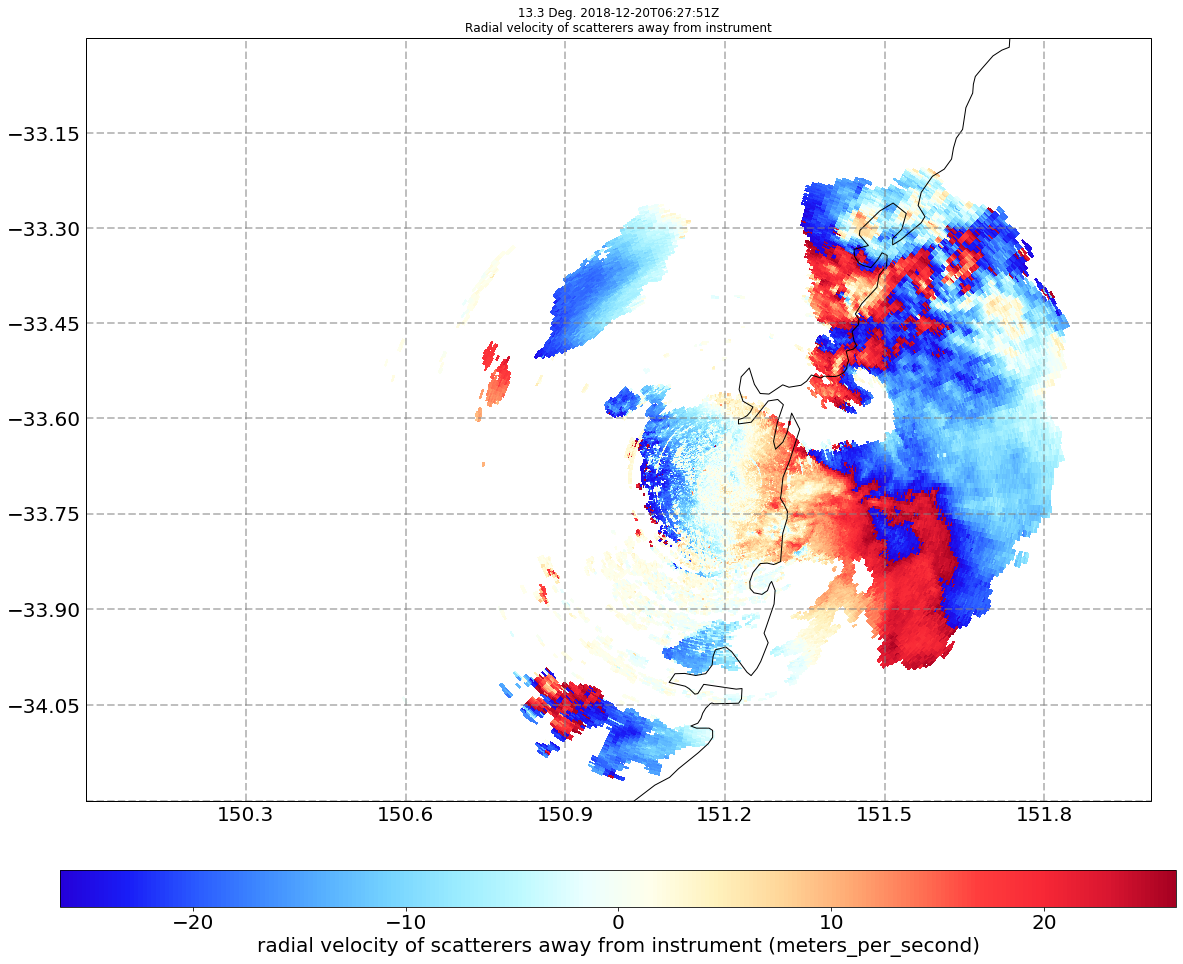

In [128]:
#pretty! but no context!
#lets use the Cartopy package to plot on a map

#I get a bit geeky on this... 

# lets get the extent of the data


#set up the plot
myf = plt.figure(figsize=[20,18])
display = pyart.graph.RadarMapDisplay(radar)

#plot a PPI. We specifically ask Py-ART not to add the colorbar... 
#We will customize this to make it nice.

display.plot_ppi_map(
    'velocity', 10,
    projection=projection, colorbar_flag=False,
    min_lon=150, max_lon=152, min_lat=-34.2, max_lat=-33,
    vmin=-nyq, vmax=nyq,
    resolution='10m')


#here is our pretty colorbar code
lb = display._get_colorbar_label('velocity')
cb = plt.colorbar(display.plots[0], aspect=30, pad=0.07, 
                  orientation='horizontal')

cb.ax.tick_params(labelsize=20)

cb.set_label(lb, fontsize=20)

#Now we add lat lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5,
                          linestyle='--')

gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

gl.xlabels_top = False
gl.ylabels_right = False

In [129]:
#Gridding!

In [130]:
grids = pyart.map.grid_from_radars(radar,(31,401,401),
                   ((0.,15000.),(-200000.,200000.),(-200000.,200000.)),
                   fields=radar.fields.keys(),
                   refl_field='reflectivity', weighting_function='BARNES2')  

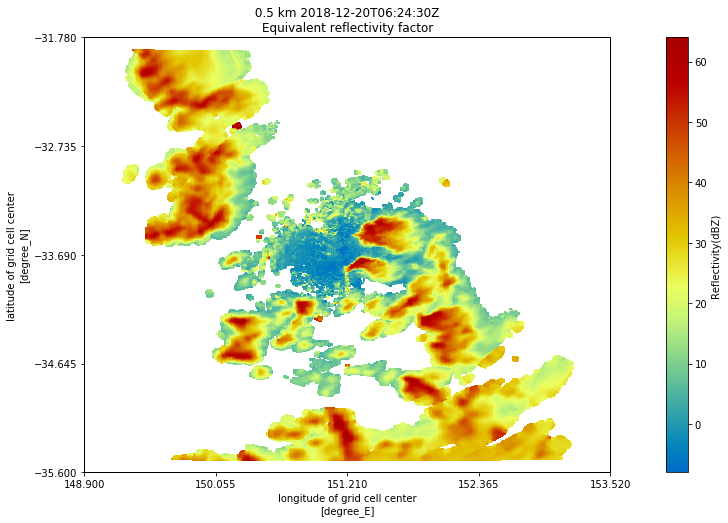

In [131]:
myf = plt.figure(figsize=[20,8])
gdisp = pyart.graph.GridMapDisplay(grids)
gdisp.plot_grid('reflectivity', level=1, vmin=-8, vmax=64)

(-100, 100)

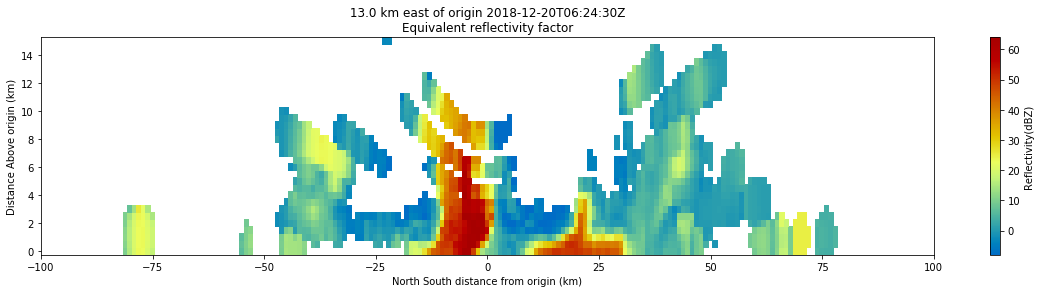

In [141]:
myf = plt.figure(figsize=[20,4])
gdisp = pyart.graph.GridMapDisplay(grids)
gdisp.plot_longitude_slice('reflectivity', lon=151.35, vmin=-8, vmax=64)
plt.xlim([-100,100])

In [42]:
inner_grids = pyart.map.grid_from_radars(radar,(31,201,201),
                   ((0.,15000.),(-50000.,50000.),(-50000.,50000.)),
                   fields=radar.fields.keys(),
                   refl_field='reflectivity', weighting_function='BARNES2',
                                        gatefilter=my_gatefilter)  

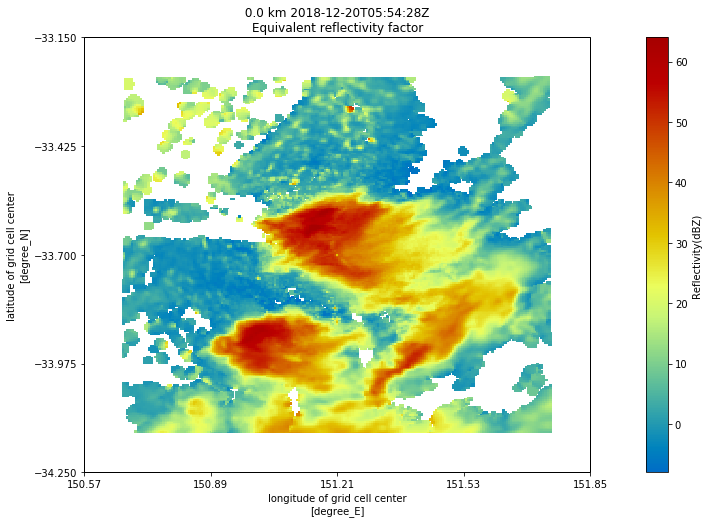

In [43]:
myf = plt.figure(figsize=[20,8])
gdisp = pyart.graph.GridMapDisplay(inner_grids)
gdisp.plot_grid('reflectivity', level=0, vmin=-8, vmax=64)
#plt.ylim([-26.5, -25.59])

## Bonus for Rob!



In [142]:
linear_z = 10.0**(deepcopy(radar.fields['reflectivity']['data'])/10.)

In [143]:
linear_z[my_gatefilter.gate_excluded] = 0.0

In [144]:
radar.add_field_like('reflectivity', 'lin_reflectivity', linear_z, replace_existing=True)

In [145]:
lin_grids = pyart.map.grid_from_radars(radar,(31,201,201),
                   ((0.,15000.),(-50000.,50000.),(-50000.,50000.)),
                   fields=['reflectivity', 'lin_reflectivity' ],
                   refl_field='reflectivity', weighting_function='BARNES2')  

In [146]:
new_z = deepcopy(lin_grids.fields['lin_reflectivity'])
new_z_dbz = np.log10(new_z['data'])*10.0
new_z['data'] = new_z_dbz

/Users/scollis/anaconda3/envs/saws/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [147]:
lin_grids.add_field('rob_special', new_z, replace_existing=True)

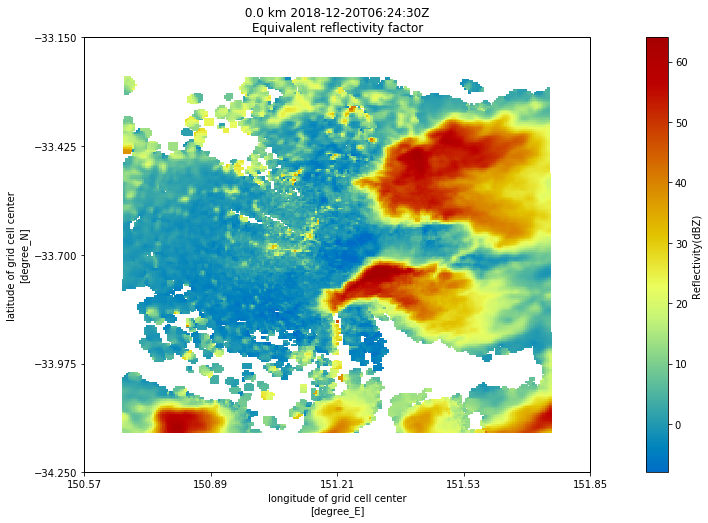

In [148]:
myf = plt.figure(figsize=[20,8])
gdisp = pyart.graph.GridMapDisplay(lin_grids)
gdisp.plot_grid('reflectivity', level=0, vmin=-8, vmax=64)
#plt.ylim([-26.5, -25.59])

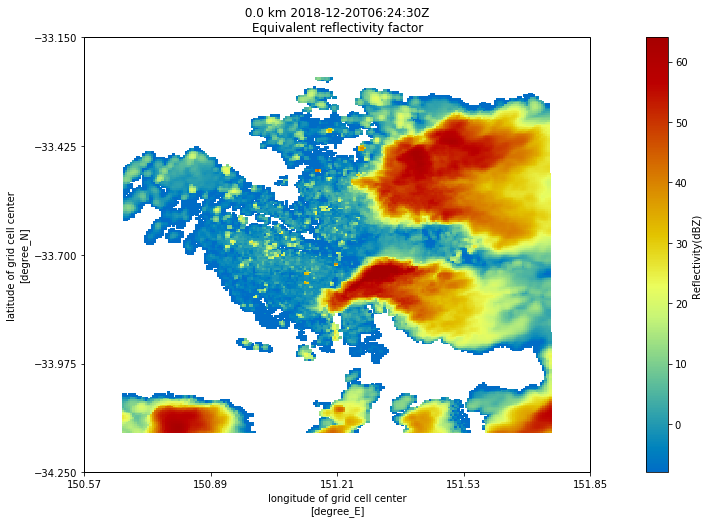

In [149]:
myf = plt.figure(figsize=[20,8])
gdisp = pyart.graph.GridMapDisplay(lin_grids)
gdisp.plot_grid('rob_special', level=0, vmin=-8, vmax=64, 
                cmap=pyart.graph.cm_colorblind.HomeyerRainbow)
#plt.ylim([-26.5, -25.59])

In [ ]:
u_init, v_init, w_init = pydda.initialization.make_wind_field_from_profile(inner_grids, profile)

In [ ]:
new_grids = pydda.retrieval.get_dd_wind_field([inner_grids],
                                    u_init, v_init, w_init,
                                    Co=1.0, Cm=1500.0, frz=4000.0,
                                    mask_outside_opt=False, 
                                    vel_name='corrected_velocity')

In [ ]:
fig = plt.figure(figsize=(20, 17))
ax = plt.axes(projection=ccrs.PlateCarree())
pydda.vis.plot_horiz_xsection_streamlines_map(
    new_grids, ax=ax, bg_grid_no=-1, level=0, w_vel_contours=[2,5])

In [ ]:
fig = plt.figure(figsize=(15, 4))
ax = plt.axes()
pydda.vis.plot_xz_xsection_streamlines(new_grids, ax=ax,
                                     bg_grid_no=-1, level=130,
                                     w_vel_contours=[3, 5, 8])


In [ ]:
pyart.io.write_grid(os.path.expanduser('~/data/one_we_prepared_earlier.nc'), new_grids[0])